## Importing modules
### Seperated between libraries to keep track

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

## Loading data

### Data has been pre-processed and features pre-selected

In [4]:
train = pd.read_csv("../data/train.csv")

X_test = pd.read_csv("../data/test.csv")
X_test_id = pd.read_csv("../data/raw_test.csv")["Id"]

y_train = train["SalePrice"]
X_train = train.drop(columns=["SalePrice"])

print("Loaded in")

Loaded in


## Building a pipeline

### Pipeline contains only the model execution, as pre-processing steps have already been covered

In [5]:
my_pipeline = Pipeline(steps=[
    ("model", RandomForestRegressor(n_estimators = 50, random_state = 0))
])

## Testing a default model with 5-fold CV

In [6]:
scores = -1 * cross_val_score(my_pipeline, X_train, y_train, 
                              cv = 5, 
                              scoring = "neg_mean_absolute_error")
print("Average MAE score:", scores.mean())

Average MAE score: 19009.497417645143


## Testing models with varying n_estimators

In [7]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps = [
        ("model", RandomForestRegressor(n_estimators, random_state = 0))
    ])
    
    scores = -1 * cross_val_score(my_pipeline, X_train, y_train, 
                              cv = 5, 
                              scoring = "neg_mean_absolute_error")
    return scores.mean()

In [8]:
results = {}
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
for i in estimators:
    results[i] = get_score(i)

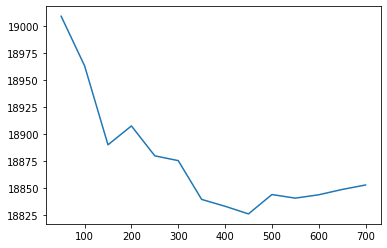

In [9]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [28]:
n_estimators_optimal = 450

In [32]:
model = RandomForestRegressor(n_estimators_optimal, random_state = 0)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=450, random_state=0)

In [43]:
y_test = model.predict(X_test)

submission = pd.DataFrame({"Id":X_test_id, "SalePrice":y_test})

submission.to_csv("./skl-randomForestRegressor/submission.csv", sep =",", index = False)